# EE379K Lab4
## Irfan Hasan (ih3976), Peter Zhang (yz7734)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1

## Part 1

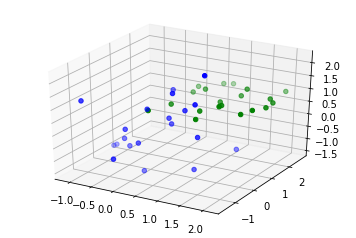

In [72]:
mean1 = [0, 0, 0]
cov1 = [[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.7]]
label1 = np.random.multivariate_normal(mean1, cov1, 20)


mean2 = [1, 1, 1]
cov2 = [[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.01]]
label2 = np.random.multivariate_normal(mean2, cov2, 20)

x1, y1, z1 = label1.T
x2, y2, z2 = label2.T

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, z1, c='b', label='1')
ax.scatter(x2, y2, z2, c='g', label='2')
plt.show()

## Part 2

Most of the points scattered within an invisible boundry with a few points outside it.

## Part 3

In [77]:
X = np.concatenate((label1, label2))

rows = X.shape[0]
ones = np.ones((rows, rows))
mean = np.divide(np.dot(ones, X), rows)
dif = np.subtract(X, mean)
covX = np.divide(np.dot(dif.T, dif), (rows-1))

print "Calculated covariance matrix:"
print covX
print
print "Build-in covariance matrix:"
print np.cov(X, rowvar = False)

Calculated covariance matrix:
[[ 0.72486621  0.45302207  0.32186617]
 [ 0.45302207  0.95637096  0.35943222]
 [ 0.32186617  0.35943222  0.71406914]]

Build-in covariance matrix:
[[ 0.72486621  0.45302207  0.32186617]
 [ 0.45302207  0.95637096  0.35943222]
 [ 0.32186617  0.35943222  0.71406914]]


## Part 4

In [74]:
w, v = np.linalg.eig(covX)
w, v

(array([ 1.57695108,  0.36237742,  0.4559778 ]),
 array([[ 0.54627539,  0.8373531 , -0.02056655],
        [ 0.68112838, -0.4583796 , -0.5709223 ],
        [ 0.48749085, -0.29787234,  0.82074645]]))

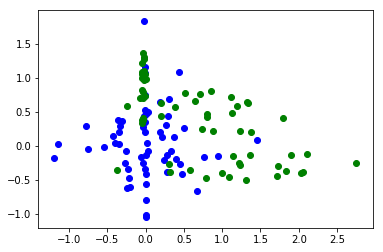

In [78]:
# (p.*v)./(v.*v)*v
def project_to_vector(p, v):
    return np.dot(np.divide(np.dot(p,v), np.dot(v,v)), v)

# EDIT THIS WHEN RECOMPILING
v1 = v[0]
v2 = v[2]

new_x1 = []
new_y1 = []
new_x2 = []
new_y2 = []
for i in range(20):
    new_x1.append(project_to_vector(label1[i], v1))
    new_y1.append(project_to_vector(label1[i], v2))
    new_x2.append(project_to_vector(label2[i], v1))
    new_y2.append(project_to_vector(label2[i], v2))
    
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(new_x1, new_y1, c='b', label='1')
ax.scatter(new_x2, new_y2, c='g', label='2')
plt.show()

PCA made it easier to distinguish the difference between two sets of data.

# Question 2

# Question 3

# Question 4